### CS3-end1-p2

#### Import libraries  

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from joblib import load

In [42]:
csv_in = 'end1-p2.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(240, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       240 non-null    float64
 1   e1      240 non-null    object 
 2   e2      240 non-null    object 
 3   e3      240 non-null    float64
 4   e4      240 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.5+ KB
None


,y,e1,e2,e3,e4
0,12.32,40-60,N,0.17,1.30
1,5.17,60-,N,1.47,-1.67
2,16.45,-20,N,-0.52,-1.59
3,10.52,40-60,H,-1.07,-0.22
4,9.52,40-60,N,0.58,0.24


In [43]:
X = df.drop(columns='y')
y = df['y']
print('X:',X.shape)
display(X.head())
print('y:',y.shape)
print(y.head())

X: (240, 4)


,e1,e2,e3,e4
0,40-60,N,0.17,1.30
1,60-,N,1.47,-1.67
2,-20,N,-0.52,-1.59
3,40-60,H,-1.07,-0.22
4,40-60,N,0.58,0.24


y: (240,)
0    12.32
1     5.17
2    16.45
3    10.52
4     9.52
Name: y, dtype: float64


In [44]:
print(X['e1'].value_counts())

40-60    72
60-      61
20-40    56
-20      51
Name: e1, dtype: int64


In [45]:
X['e1'] = X['e1'].replace(
    {'-20':1, '20-40':2,
     '40-60':3, '60-':4,
    }
)
display(X.head())


,e1,e2,e3,e4
0,3,N,0.17,1.30
1,4,N,1.47,-1.67
2,1,N,-0.52,-1.59
3,3,H,-1.07,-0.22
4,3,N,0.58,0.24


In [46]:
print(X['e2'].value_counts())

H    84
N    81
C    75
Name: e2, dtype: int64


In [47]:
X_dumm = pd.get_dummies(X, drop_first=True)
print('X_dumm:', X_dumm.shape)
display(X_dumm.head())

X_dumm: (240, 5)


,e1,e3,e4,e2_H,e2_N
0,3,0.17,1.30,0,1
1,4,1.47,-1.67,0,1
2,1,-0.52,-1.59,0,1
3,3,-1.07,-0.22,1,0
4,3,0.58,0.24,0,1


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X_dumm,y,test_size=0.33,random_state=28)

In [49]:
print(X_test.shape)
print(y_test.shape)

(80, 5)
(80,)


In [50]:
rfr = RandomForestRegressor(n_estimators=300,max_depth=None,random_state=43)

In [51]:
%%time
rfr.fit(X_train,y_train)

CPU times: total: 328 ms
Wall time: 350 ms


RandomForestRegressor(n_estimators=300, random_state=43)

In [52]:
ser_fi = pd.Series(rfr.feature_importances_, index=X_train.columns)
print(ser_fi.sort_values(ascending=False))

e2_N    0.287392
e2_H    0.266108
e3      0.213313
e4      0.199019
e1      0.034167
dtype: float64


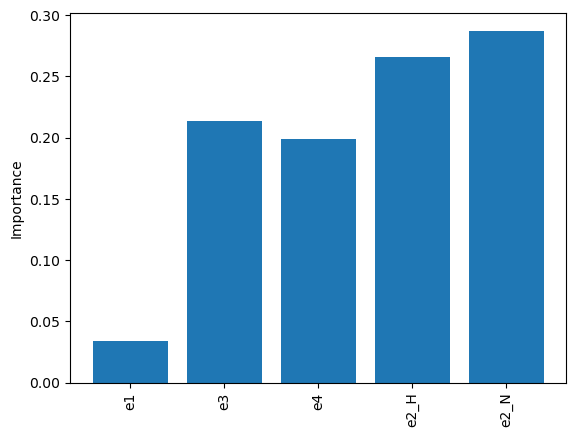

In [53]:
plt.bar(X_train.columns, rfr.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [54]:
y_train_pred = rfr.predict(X_train)

In [55]:
y_min = np.append(y_train_pred, y_train).min()
y_max = np.append(y_train_pred, y_train).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

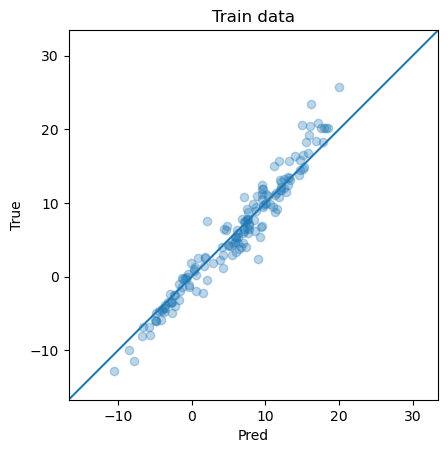

In [56]:
y_max += y_margin
plt.scatter(y_train_pred, y_train, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.title('Train data')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [57]:
mse = mean_squared_error(y_train, y_train_pred)
print('MSE, RMSE for train data:', mse, np.sqrt(mse))

MSE, RMSE for train data: 3.715420605624993 1.9275426339318653


In [58]:
y_test_pred = rfr.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_test_pred)
print('MSE, RMSE for test data:', mse, np.sqrt(mse))

MSE, RMSE for test data: 17.844390100736128 4.2242620776576025


In [65]:
csv_in1 = 'end1-p2-pred.csv'
df1 = pd.read_csv(csv_in1, skiprows=0, header=0)
display(df1.head())

,e1,e2,e3,e4
0,-20,C,0.50,-0.15
1,-20,H,-1.42,1.72
2,60-,N,-0.78,0.56
3,40-60,C,0.67,0.05
4,20-40,H,-1.18,-1.14


In [66]:
print(df1['e1'].value_counts())

-20      13
60-      13
40-60    13
20-40    11
Name: e1, dtype: int64


In [67]:
df1['e1'] = df1['e1'].replace(
    {'-20':1, '20-40':2,
     '40-60':3, '60-':4,
    }
)
display(X.head())

,e1,e2,e3,e4
0,3,N,0.17,1.30
1,4,N,1.47,-1.67
2,1,N,-0.52,-1.59
3,3,H,-1.07,-0.22
4,3,N,0.58,0.24


In [70]:
df1_dumm = pd.get_dummies(df1, drop_first=True)
print('df1_dumm:', df1_dumm.shape)
display(df1_dumm.head())

df1_dumm: (50, 5)


,e1,e3,e4,e2_H,e2_N
0,1,0.50,-0.15,0,0
1,1,-1.42,1.72,1,0
2,4,-0.78,0.56,0,1
3,3,0.67,0.05,0,0
4,2,-1.18,-1.14,1,0


In [73]:
y_df1 = rfr.predict(df1_dumm)
print(y_df1.max())

17.28346666666667
